# Figure 1 – Verger-Miralles et al. (2025)

**SWOT enhances small-scale eddy detection in the Mediterranean Sea**

Author: *Elisabet Verger-Miralles*  
Institution: IMEDEA (CSIC-UIB)

In [1]:
import numpy                 as np
import matplotlib.pyplot     as plt
import matplotlib.gridspec   as gridspec
import cartopy.crs           as ccrs
import cartopy.feature       as cfeature
import xarray                as xr
import cmocean
import scipy.io
import scipy.io as sio
import netCDF4               as netcdf
import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.feature as cf

In [2]:
lonmin, lonmax, latmin, latmax = 1, 5, 38.5, 41 # Balearic Sea

# IMPORT DATA

Swaths of SWOT:

In [3]:
dir_swaths =  '../../grl_codes_to_publish_def_swotv2.0.1/data/'
file_swaths1 = dir_swaths + 'MED_fastPhase_1km_swotFAST_grid_p009.nc'
file_swaths2 = dir_swaths + 'MED_fastPhase_1km_swotFAST_grid_p022.nc'

In [4]:
nc    = netcdf.Dataset(file_swaths1, 'r')
latsw1  = nc.variables['lat'][:]   
lonsw1  = nc.variables['lon'][:]  
x_ac1   = nc.variables['x_ac'][:]  # "Across track distance from nadir"

lonnd1  = nc.variables['lon_nadir'][:] 
latnd1  = nc.variables['lat_nadir'][:] 
nc.close()     

nc    = netcdf.Dataset(file_swaths2, 'r')
latsw2  = nc.variables['lat'][:]   
lonsw2  = nc.variables['lon'][:]  
x_ac2   = nc.variables['x_ac'][:]  # "Across track distance from nadir"

lonnd2  = nc.variables['lon_nadir'][:] 
latnd2  = nc.variables['lat_nadir'][:]     

In [5]:
mat = sio.loadmat(dir_swaths + 'swot_calval_orbit_jun22015-v2-swath.mat')
swath = mat['lonlat_swot_track_swath']

Bathymetry:


In [6]:
file_topo   = dir_swaths + 'usgsCeSrtm30v6_8303_496d_dd25.nc'

In [7]:
nc        = netcdf.Dataset(file_topo, 'r')
lat_topo  = nc.variables['latitude'][:] 
lon_topo  = nc.variables['longitude'][:] 
topo      = nc.variables['topo'][:] # [m]  
nc.close()

# Limit region

ilont_dom = np.where(np.logical_and(lon_topo>=lonmin-1, lon_topo<=lonmax+1))
jlatt_dom = np.where(np.logical_and(lat_topo>=latmin-1, lat_topo<=latmax+1))

lon_topo_dom = lon_topo[ilont_dom]
lat_topo_dom = lat_topo[jlatt_dom][::-1] 
topo_dom     = topo[jlatt_dom,:].squeeze()[:, ilont_dom].squeeze()[::-1, :]

lon_topo2d, lat_topo2d = np.meshgrid(lon_topo_dom, lat_topo_dom)

### SHIP TRAJECTORY


LEG 1

In [8]:
url_root = "http://thredds.socib.es/thredds/dodsC/research_vessel/"

url_vars = "trajectory,time[0:1:10597],LAT[0:1:10597],QC_LAT[0:1:10597],LON[0:1:10597],QC_LON[0:1:10597],DEPTH,PLAT_COUR[0:1:10597],QC_PLAT_COUR[0:1:10597],PLAT_SPEED[0:1:10597],QC_PLAT_SPEED[0:1:10597],SEA_FLOOR_DEPTH[0:1:10597],QC_SEA_FLOOR_DEPTH[0:1:10597]"

url_01 = url_root + "gps/socib_rv-scb_pos001/L1/2023/04/dep0106_socib-rv_scb-pos001_L1_2023-04-25.nc?" + url_vars

In [9]:
ds_GPS_L1_Leg1 = xr.open_dataset(url_01)

### DRIFTERS


LEG 1:
    

In [10]:
# SVP-B DEPLOYMENTS
lon_svp = [1.424,1.488,1.581,1.669, 1.716]
lat_svp = [39.646,39.801,40.022,39.88,39.804]

##### DRIFTER's TRAJECTORIES:

SVP (With inertial oscilations filtered):

In [11]:
filedir = '../../grl_codes_to_publish_def_swotv2.0.1/data/drifters_filtered/SVPB/'

In [12]:
#42: 26/04
drifter_num = '42'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp042 = xr.open_dataset(url_01)
#41: 26/04
drifter_num = '41'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp041 = xr.open_dataset(url_01)
#40: 26/04
drifter_num = '40'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp040 = xr.open_dataset(url_01)
#39: 26/04
drifter_num = '39'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp039 = xr.open_dataset(url_01)
# #38: 26/04
drifter_num = '38'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp038 = xr.open_dataset(url_01)
#35: 23/02
drifter_num = '35'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt_subset.nc"
ds_svp035 = xr.open_dataset(url_01)

In [13]:
ds_svp_leg1 = [ds_svp035, ds_svp038, ds_svp039, ds_svp040, ds_svp041, ds_svp042]

### GLIDER:


In [14]:
dir_file = '../../grl_codes_to_publish_def_swotv2.0.1/data/glider/'

file_path = 'glider09_section4_fast_swot.nc'

ds = xr.open_dataset(dir_file+file_path)

In [15]:
Lon_gli = ds.lon.squeeze()
Lat_gli = ds.lat.squeeze()

### CTDs:

In [16]:
# Leg 1
ctd1 = [39.5415, 1.3762 ]
ctd2 = [39.6868 ,1.4410 ]
ctd3 = [39.8014, 1.4896 ]
ctd3 = [39.9060 ,1.5347 ]
ctd4 = [40.0219 ,1.5839 ]
ctd5 = [39.7760 ,1.7334 ]
ctd6 = [39.9295 ,1.2534 ]
ctd7 = [39.7750 ,1.7335 ]
ctd8 = [39.9404, 1.3927 ]
ctd9 = [39.8610 ,1.4248 ]
ctd10 = [39.8044 ,1.4464 ]
ctd11 = [39.7599 ,1.5170]

In [17]:
ctds_leg1 = [ctd1, ctd2, ctd3, ctd4, ctd5, ctd6,
             ctd7, ctd8, ctd9, ctd10, ctd11]

## MVP

In [31]:
dir_mvp = 'C:/Users/ASUS/Desktop/MVP/Leg1/'
files_mvp = glob.glob(dir_mvp+'*.m1')
files_mvp = np.sort(files_mvp)

In [34]:
lons_mvp = []
lats_mvp = []

for file in files_mvp:
    
    mvp = open(file)
    
    attrs = {} #empty dictionary

    start_reading_data = False
    going_down = False
    last_depth = 0

    for line in mvp.readlines(): # loop of each line of the file mvp
    
        if ':' in line:
            attr = line.strip().lstrip().split(':')
            attrs[attr[0].split(' (')[0].replace(' ','_')] = ':'.join(attr[1:]) 
    
    # Extract lat and lon values from the attrs dictionary. 

    lat = attrs['LAT'].replace(' ','').split(',')[0]
    lat = float(lat[:2]) + float(lat[2:])/60

    lon = attrs['LON'].replace(' ','').split(',')[0]
    lon = float(lon[:3]) + float(lon[3:])/60 

    lons_mvp.append(lon)
    lats_mvp.append(lat)

### SST maps:

In [36]:
dir_SST  =  '../../grl_codes_to_publish_def_swotv2.0.1/data/SST/'
file_SST = '20230421000000-GOS-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-MED-v02.0-fv02.0.nc'

In [37]:
dsSST    = xr.open_dataset(dir_SST + file_SST)
time_SST = dsSST['time']
time_SST

<xarray.DataArray 'time' (time: 1)> Size: 8B
array(['2023-04-21T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 8B 2023-04-21
Attributes:
    long_name:      reference time of sst field
    standard_name:  time
    axis:           T
    comment:        Nominal time of Level 4 analysis

In [38]:
lon_SST = dsSST['lon'].values
lat_SST = dsSST['lat'].values

sst = dsSST['adjusted_sea_surface_temperature'][0].values -273.15

***



## FIGURE

In [39]:
# Define the extent of the Balearic Sea
ll_lon, ll_lat = 1.1, 39.15  # Lower-left corner
ur_lon, ur_lat = 2.9, 40.15  # Upper-right corner

In [40]:
msize = 20  
fsize = 12 

findfont: Font family 'suranna' not found.
findfont: Font family 'suranna' not found.
findfont: Font family 'suranna' not found.
findfont: Font family 'suranna' not found.
findfont: Font family 'suranna' not found.


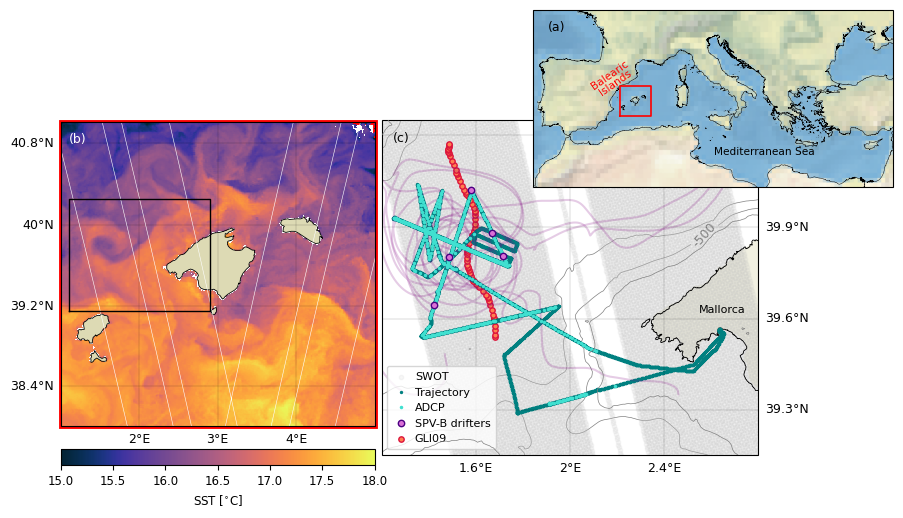

In [41]:
fig = plt.figure(figsize=(9, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2], wspace=0.02)  # Left: SST subplot, Right: Main plot

## SST subplot (left)
ax_sst = plt.subplot(gs[0], projection=ccrs.Mercator())
ax_sst.set_extent([1, 5, 38, 41], crs=ccrs.PlateCarree())
ax_sst.add_feature(cfeature.LAND, facecolor='darkkhaki', alpha=0.5)
ax_sst.coastlines(resolution='10m', linewidth=0.6)

c_sst = ax_sst.pcolormesh(lon_SST, lat_SST, sst, cmap=cmocean.cm.thermal, vmin=15, vmax=18, transform=ccrs.PlateCarree())
c_sst = plt.colorbar(c_sst, ax=ax_sst, orientation='horizontal', pad=0.05)

c_sst.ax.tick_params(labelsize=8.5)

c_sst.set_label('SST [$^{\circ}$C]', fontsize=8.5) 

ax_sst.patch.set_edgecolor('r')
ax_sst.patch.set_linewidth(3.5)  

gl = ax_sst.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='-')
gl.ylocator = plt.MaxNLocator(4)
gl.xlocator = plt.MaxNLocator(4)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}

ax_sst.plot(swath[:,0], swath[:,1], c='w',transform=ccrs.PlateCarree(),linewidth=0.4)

ax_sst.plot([ll_lon, ur_lon, ur_lon, ll_lon, ll_lon], [ll_lat, ll_lat, ur_lat+0.1, ur_lat+0.1, ll_lat], 'k', linewidth=1, transform=ccrs.PlateCarree())


## Main plot (right - map)
ax_main = plt.subplot(gs[1], projection=ccrs.Mercator())
ax_main.set_extent([ll_lon+0.1, ur_lon-0.1, ll_lat, ur_lat+0.1], crs=ccrs.PlateCarree())
coast = cf.GSHHSFeature(scale='full')
ax_main.add_feature(coast, linewidth=0.6)
ax_main.add_feature(cfeature.LAND, facecolor='darkkhaki', alpha=0.2)

# SWATHS
ax_main.scatter(lonsw1, latsw1, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonsw2, latsw2, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonnd1, latnd1, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree())
ax_main.scatter(lonnd2, latnd2, c='silver', s=msize/2, zorder=1, alpha=0.12, transform=ccrs.PlateCarree(), label='SWOT')

# Ship's trajectory
ax_main.scatter(ds_GPS_L1_Leg1.LON, ds_GPS_L1_Leg1.LAT, c='teal', label='Trajectory', s=2, zorder=2, transform=ccrs.PlateCarree())
ax_main.plot(lons_mvp, lats_mvp, 'o', c='turquoise', markersize=1.5, transform=ccrs.PlateCarree(), label='ADCP', zorder=3)

# Drifters
ax_main.scatter(lon_svp, lat_svp, c='orchid', edgecolor='indigo', s=21, transform=ccrs.PlateCarree(), zorder=5, label='SPV-B drifters')

# Drifter trajectories
for ds in ds_svp_leg1:
    ax_main.plot(ds['LON'], ds['LAT'], transform=ccrs.PlateCarree(), alpha=0.2, c='purple')

# Glider
ax_main.scatter(Lon_gli, Lat_gli, c='coral', s=msize-5, transform=ccrs.PlateCarree(), zorder=1, edgecolors='crimson', label='GLI09')

# Bathymetry
cs1000 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-1000],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=0,
                transform=ccrs.PlateCarree())

cs200 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-200],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=100,
                transform=ccrs.PlateCarree())

cs500 = ax_main.contour(lon_topo2d, lat_topo2d, topo_dom, levels=[-500],#Blues_r, #cmo.haline,
                    colors='gray', linewidths = 0.5, linestyles='-', zorder=0, transform=ccrs.PlateCarree())

# Add contour labels
plt.clabel(cs1000, inline=2, fontsize=fsize-3, fmt='%1.0f', colors='gray')
plt.clabel(cs500, inline=1, fontsize=fsize-3, fmt='%1.0f', colors='gray')
plt.clabel(cs200, inline=1, fontsize=fsize-3, fmt='%1.0f', colors='gray')


gl = ax_main.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='-', zorder=2)
gl.ylocator = plt.MaxNLocator(4)
gl.xlocator = plt.MaxNLocator(4)

gl.top_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}

ax_main.text(2.55, 39.62, 'Mallorca', fontsize=8, color='k', transform=ccrs.PlateCarree(), fontname='suranna')

plt.legend(loc='lower left', fontsize=8, ncol=1, columnspacing=0.5, handletextpad=0.5, handlelength=1.5, borderpad=0.5, labelspacing=0.5) #bbox_to_anchor=(1.3, 0),

## Inset map (top right)
ax_inset = fig.add_axes([0.65, 0.61, 0.4, 0.4], projection=ccrs.Mercator())
ax_inset.set_extent([-10.1, 36, 30.5, 48], crs=ccrs.PlateCarree())
ax_inset.add_feature(cf.GSHHSFeature(scale='full'), linewidth=0.3)
ax_inset.add_feature(cfeature.LAND, facecolor='darkkhaki')
ax_inset.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax_inset.stock_img()

# Highlight Balearic Sea
ax_inset.plot([1, 5, 5, 1, 1], [38, 38, 41, 41, 38], 'r', linewidth=1.2, transform=ccrs.PlateCarree())

ax_inset.text(13, 34.05, 'Mediterranean Sea', fontsize=7.6, color='k', transform=ccrs.PlateCarree()) #fontname='suranna'
ax_inset.text(-2.85, 40.7, 'Balearic', rotation=35, fontsize=7.6, color='r', transform=ccrs.PlateCarree()) #, fontname='suranna'
ax_inset.text(-1.85, 40.1, 'Islands', rotation=35, fontsize=7.6, color='r', transform=ccrs.PlateCarree()) #, fontname='suranna'

# a,b,c
ax_inset.text(-8.2, 46.15, '(a)', fontsize=9, color='k', transform=ccrs.PlateCarree())
ax_sst.text(1.1, 40.8, '(b)', fontsize=9, color='w', transform=ccrs.PlateCarree())
ax_main.text(1.25, 40.18, '(c)',fontsize=9, color='k',transform=ccrs.PlateCarree())

# plt.savefig('C:/Users/ASUS/OneDrive - Universitat de les Illes Balears/grl_codes_to_publish_def_swotv2.0.1/figures_def/figure1.png', dpi=600, bbox_inches='tight')

plt.show()